In [51]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline 

In [60]:
df = np.array([])

for i in range(10):
    data = np.array(pd.read_csv(f'American Sign Language Digits Dataset/{i}/Output Images - Sign {i}.csv'))
    df = np.append(df,data)
df = df.reshape((5000,65))
np.random.shuffle(df)
paths = df[:,0]
X = df[:,1:64]
y = df[:,64]
X_scale = StandardScaler()
X = X_scale.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [53]:
#Returns a model given the training data
def logreg_model_asl(c, X_train, Y_train):
    logreg = linear_model.LogisticRegression(C=c)
    logreg.fit(X_train, Y_train)
    return logreg
    
def logreg_model_asl_l1(c, X_train, Y_train):
    logreg = linear_model.LogisticRegression(penalty='l1', C=c, solver='saga')
    logreg.fit(X_train, Y_train)
    return logreg

#Modifies the labels for 1 vs all classification
#e.g. if we are testing for "1", all the labels != 1 will be set to 0
def change_labels(Y_train, num):
    ans = np.array([1 if elem == num else 0 for elem in Y_train])
    return ans

In [54]:
#1 vs all classification

#predict given all 10 "1 vs all models"
def prediction(X, models):
    confidences = [model.predict(X) for model in models]
    ans = []
    for i in range(X.shape[0]):
        mostconfident = -1
        confidence = -1
        for j in range(10):
            if confidences[j][i] > confidence:
                confidence = confidences[j][i]
                mostconfident = j
        ans.append(mostconfident)
    return ans

#accuracy
def accuracy(Yhat, Y):
    correct = [1 if Yhat[i] == Y[i] else 0 for i in range(len(Y))]
    return sum(correct)/len(correct)

def logreg(c, X_train, Y_train, X_test, Y_test, l2 = True):
    models = []
    for i in range(10):
        Y_train_temp = change_labels(Y_train,i)
        if l2:
            models.append(logreg_model_asl(c,X_train, Y_train_temp))
        else:
            models.append(logreg_model_asl_l1(c,X_train, Y_train_temp))
    
    Yhat_train = prediction(X_train, models)
    acc_train = accuracy(Yhat_train, Y_train)
    
    Yhat_test = prediction(X_test, models)
    acc_test = accuracy(Yhat_test, Y_test)
    
    return (c, acc_train, acc_test)


In [5]:
models = logreg(10000000, X_train, y_train, X_test, y_test, False)
models

c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

POLYNOMIAL TRANSFORMATION

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
poly = PolynomialFeatures(2)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)

In [105]:
models = logreg(1, X_transformed_train, y_train, X_transformed_test, y_test)
models

c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [68]:
c = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16,16.5,17,17.5,18, 18.5, 19, 19.5,20]
poly = PolynomialFeatures(2)
X_transformed_train = poly.fit_transform(X_train)
X_transformed_test = poly.fit_transform(X_test)
train = []
test = []
for cval in c:
    res = logreg(cval, X_transformed_train, y_train, X_transformed_test, y_test, False)
    train.append(res[1])
    test.append(res[2])

c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\users\jiaya\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_

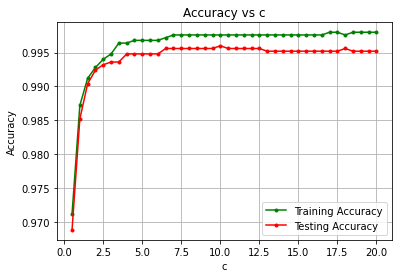

In [69]:
plt.plot(c,train,'.-',color='green')
plt.plot(c,test,'.-',color='red')
plt.title("Accuracy vs c")
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.legend(["Training Accuracy", "Testing Accuracy"])
plt.grid()

In [70]:
train[-1]

0.998

In [75]:
test[19]

0.996